In [1]:
from datetime import timedelta, datetime
import copy 
import PIL
import numpy as np
import matplotlib.pyplot as plt

import observatories
import data
import events
import analysis
import const
import reference


%load_ext autoreload
%autoreload 2

In [10]:
jan = analysis.loadData(2022,1)
jan[0]

[['III', 01:27:56, 01:28:14, '0.6035'], ['III', 03:01:20, 03:01:39, '0.6006'], ['III', 03:25:42, 03:26:09, '0.6479'], ['III', 03:28:06, 03:28:23, '0.6108'], ['III', 04:45:48, 04:46:15, '0.6438'], ['III', 07:26:42, 07:27:17, '0.6358'], ['III', 12:35:26, 12:35:55, '0.6646'], ['III', 12:56:27, 12:57:09, '0.6493'], ['III', 13:43:19, 13:43:27, '0.9865'], ['III', 13:44:47, 13:44:53, '0.6379'], ['III', 14:53:22, 14:53:29, '0.6281'], ['III', 14:59:22, 14:59:45, '0.8561'], ['III', 15:13:37, 15:13:48, '0.7044'], ['III', 15:15:54, 15:16:14, '0.6122'], ['III', 15:21:08, 15:21:17, '0.6612'], ['III', 16:00:49, 16:01:02, '0.6118'], ['III', 17:39:53, 17:40:10, '0.6343'], ['III', 19:18:46, 19:19:04, '0.6064'], ['III', 19:35:51, 19:36:11, '0.6325'], ['III', 21:54:10, 21:54:32, '0.6685'], ['III', 21:58:09, 21:58:41, '0.6569'], ['III', 22:24:36, 22:25:24, '0.6724'], ['III', 22:33:13, 22:33:28, '0.8558'], ['III', 22:58:06, 22:58:22, '0.6191']]

['III', 13:43:19, 13:43:27, '0.9865'] [ROSWELL-NM, TRIEST, AUSTRIA-OE3FLB, HUMAIN, SWISS-Landschlacht, AUSTRIA-UNIGRAZ, Arecibo-Observatory]


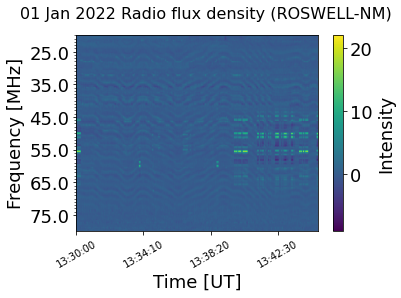

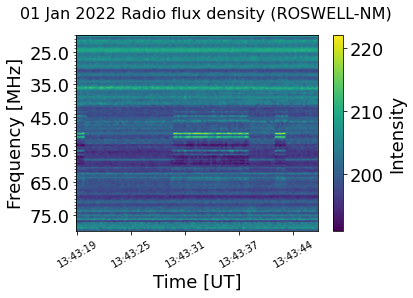

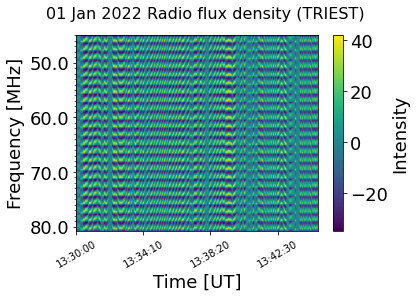

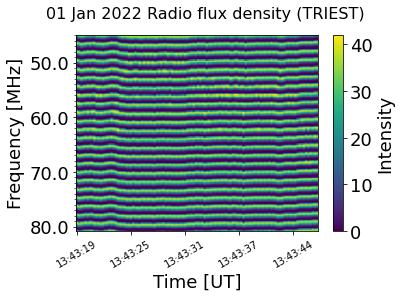

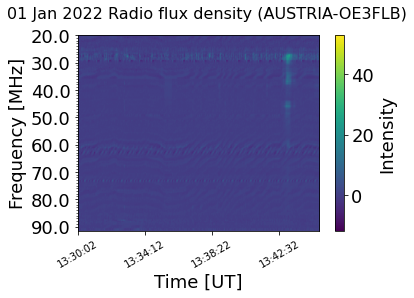

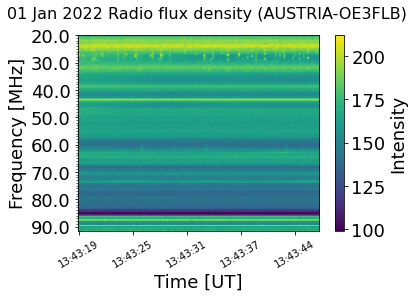

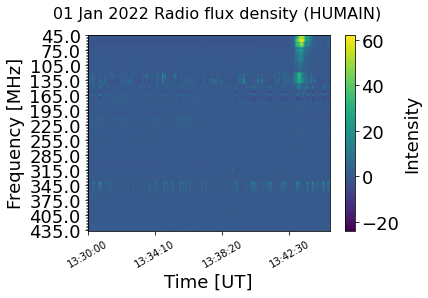

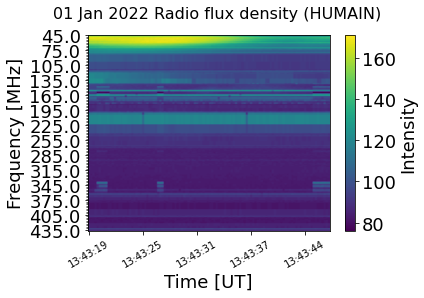

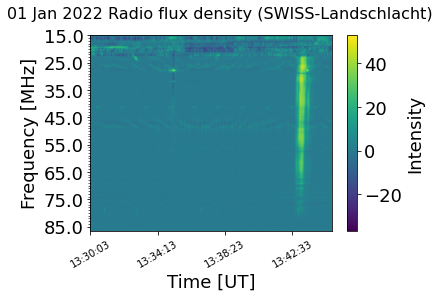

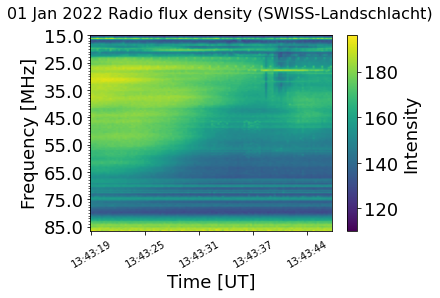

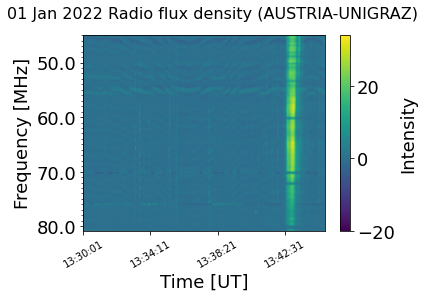

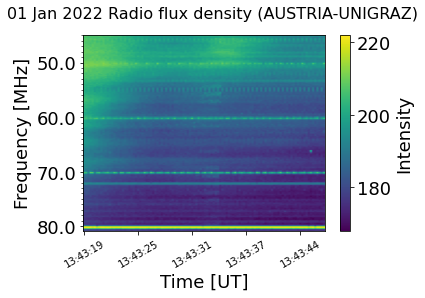

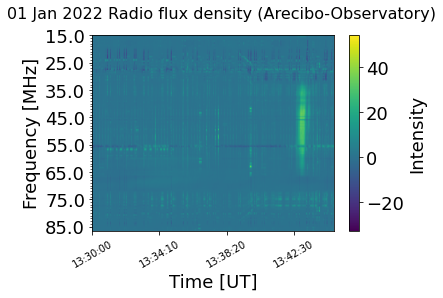

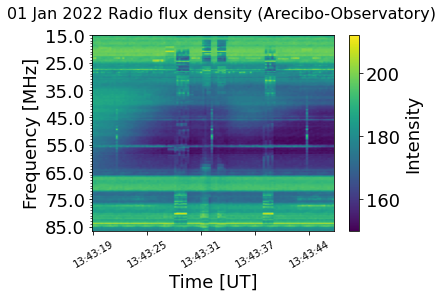

In [20]:
for i in jan[0]:
    if i.probability > 0.9:
        time = i.time_start
        print(i, i.stations)
        for j in i.stations:
            dp1 = data.createFromTime(time.year, time.month ,time.day,str(time),j,const.spectral_range)
            dp1.subtract_background()
            dp1.plot()

            dp2 = data.createFromEvent(i, station=j)
            dp2.plot()

# TODO

In [ ]:
for i in jan[0]:
    # create sets of stations
    # create DataPoints
    # run correlation
    # run peaks in data | only run correlation if peak at time+- 
    # then run classification 
    # 
    pass

TODO - see how the lin reg thingy works for type 3 / 4 / 6

In [19]:
t3 = []
for i in range(1,32):
    l = reference.listSWPC(2022,1,i)
    for j in l:
        if not j.burst_type.startswith("III/"):
            continue
        print(i, j, j.stations)
        t3.append(j)

1 ['III/1', 04:53:00, 04:53:00, '1.0000'] []
1 ['III/3', 13:42:00, 13:43:00, '1.0000'] []
7 ['III/2', 03:24:00, 03:30:00, '1.0000'] []
7 ['III/1', 04:50:00, 04:56:00, '1.0000'] []
7 ['III/1', 12:11:00, 12:11:00, '1.0000'] []
8 ['III/2', 18:46:00, 18:46:00, '1.0000'] []
8 ['III/2', 23:04:00, 23:04:00, '1.0000'] []
9 ['III/2', 00:22:00, 00:23:00, '1.0000'] []
9 ['III/1', 10:11:00, 10:12:00, '1.0000'] []
9 ['III/1', 12:30:00, 12:30:00, '1.0000'] []
9 ['III/1', 14:07:00, 14:07:00, '1.0000'] []
9 ['III/1', 18:18:00, 18:24:00, '1.0000'] []
10 ['III/2', 06:56:00, 06:59:00, '1.0000'] []
10 ['III/1', 16:36:00, 16:36:00, '1.0000'] []
10 ['III/1', 18:23:00, 18:23:00, '1.0000'] []
10 ['III/2', 18:48:00, 18:54:00, '1.0000'] []
10 ['III/1', 19:34:00, 19:37:00, '1.0000'] []
10 ['III/1', 19:44:00, 19:44:00, '1.0000'] []
11 ['III/2', 05:21:00, 05:30:00, '1.0000'] []
11 ['III/1', 18:10:00, 18:16:00, '1.0000'] []
11 ['III/2', 22:56:00, 23:03:00, '1.0000'] []
12 ['III/2', 03:26:00, 03:26:00, '1.0000'] []


In [7]:
t2 = []
for i in range(1,32):
    l = reference.listSWPC(2022,1,i)
    for j in l:
        if not j.burst_type.startswith("II/"):
            continue
        print(i, j, j.stations)
        t2.append(j)

9 ['II/2', 22:52:00, 23:07:00, '1.0000'] []
12 ['II/2', 04:26:00, 04:50:00, '1.0000'] []
18 ['II/1', 17:31:00, 17:42:00, '1.0000'] []
20 ['II/2', 05:57:00, 06:13:00, '1.0000'] []


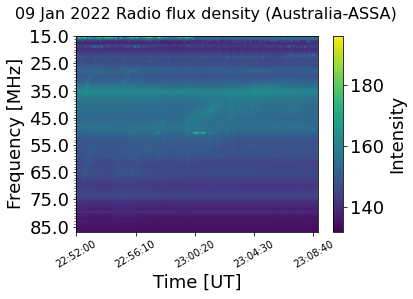

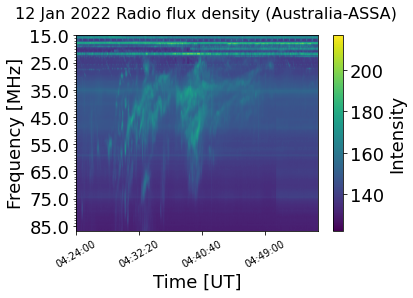

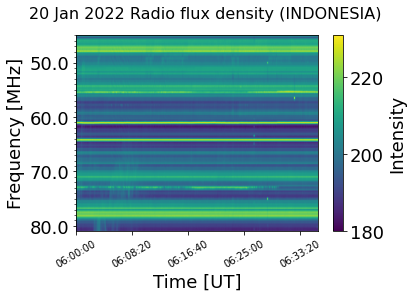

In [9]:
for i in t2:
    dp = data.createFromEvent(i, observatories.indonesia)
    dp.plot()

In [115]:
tt = events.Event(datetime(2022,1,20,5,52), datetime(2022,1,20,6,20))

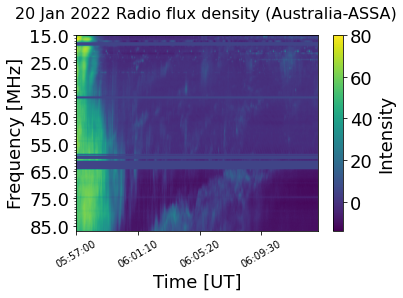

/tmp/ipykernel_2774/1842287619.py:8: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  img_re = img.resize((int(pp.shape[1]/10), int(p.spectrum_data.data.shape[0]/10)), resample=PIL.Image.BILINEAR )


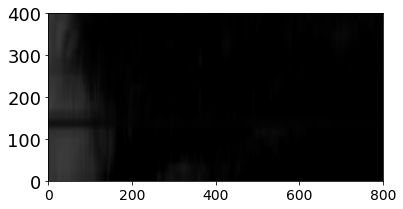

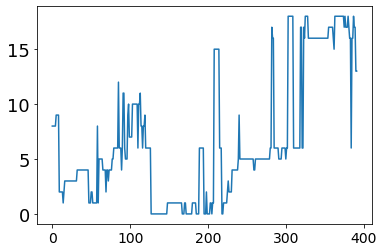

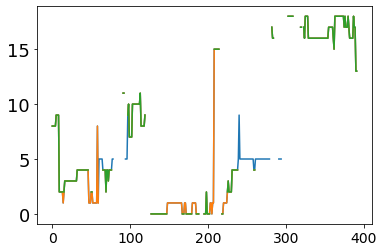

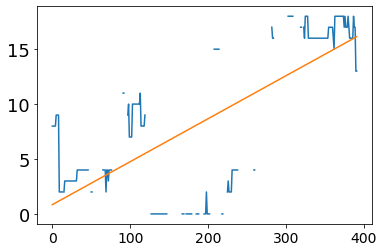

In [17]:
p = data.createFromEvent(t2[3], observatories.assa)
p.subtract_background()
fmask = analysis.maskBadFrequencies(p)
p.spectrum_data.data[fmask] = np.nanmean(p.spectrum_data.data)
p.plot()
pp = p.spectrum_data.data
img = PIL.Image.fromarray(pp)
img_re = img.resize((int(pp.shape[1]/10), int(p.spectrum_data.data.shape[0]/10)), resample=PIL.Image.BILINEAR )
plt.imshow(img_re, extent=[0,800,0,400], origin="lower")
plt.show()
o = np.array(img_re).transpose()
m = []
for i in o:
    m.append(np.argmax(i))

plt.plot(m)
plt.show()

for i in range(3):
    counts = {}
    for i in m:
        if i in counts and np.isfinite(i):
            counts[i] += 1
        else:
            counts[i] = 1
    counts = [list(counts.keys()),list(counts.values())]
    for i, j in enumerate(m): # count maxargs , ned max
        if j == counts[0][np.argmax(counts[1])]:
            m[i] = np.nan
    plt.plot(m)

plt.show()

plt.plot(m)
m = np.array(m)
x = np.arange(len(m))
idx = np.isfinite(m) & np.isfinite(x)
linfit = np.polyfit(x[idx],m[idx],1)
plt.plot(x,linfit[0]*x + linfit[1])
plt.show()

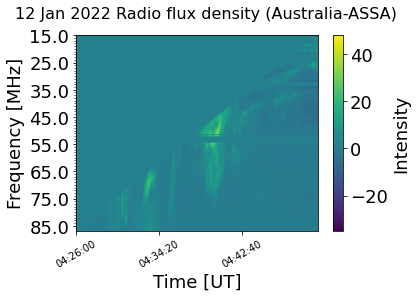

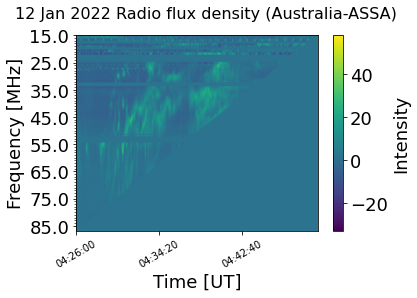

-155391.3112787928 417576.4749545641
386318.86463020334


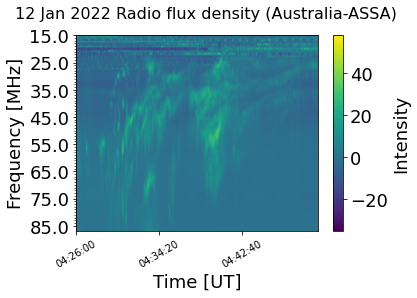

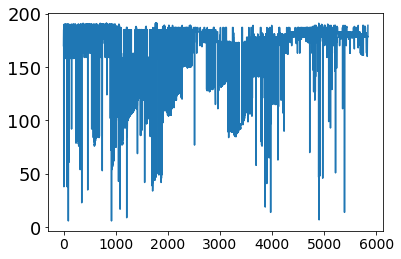

In [53]:
def maskUpper(arr):
    return np.array([[j/arr.shape[1] < i/arr.shape[0] for j in range(arr.shape[1])] for i in range(arr.shape[0])])

def maskLower(arr):
    return np.array([[j/arr.shape[1] > i/arr.shape[0] for j in range(arr.shape[1])] for i in range(arr.shape[0])])


p = data.createFromEvent(t2[1], observatories.assa)
p.subtract_background()
pu = copy.deepcopy(p)
pl = copy.deepcopy(p)
fu_mask = analysis.maskBadFrequencies(pu)
pu.spectrum_data.data[fu_mask] = np.nanmean(pu.spectrum_data.data)
pumask = maskUpper(pu.spectrum_data.data)
pu.spectrum_data.data[pumask] = np.nanmean(pu.spectrum_data.data)
pu.plot()
fl_mask = analysis.maskBadFrequencies(pl)
pl.spectrum_data.data[fl_mask] = np.nanmean(pl.spectrum_data.data)
plmask = maskLower(pl.spectrum_data.data)
pl.spectrum_data.data[plmask] = np.nanmean(pl.spectrum_data.data)
pl.plot()

p1 = np.nansum(pu.spectrum_data.data)-np.mean(p.spectrum_data.data)*p.spectrum_data.data.shape[0]*p.spectrum_data.data.shape[1]
p2 = np.nansum(pl.spectrum_data.data)-np.mean(p.spectrum_data.data)*p.spectrum_data.data.shape[0]*p.spectrum_data.data.shape[1]

print(p1, p2)
print((p2-p1)/np.nanmean(p.spectrum_data.data))

p.plot()
o = p.spectrum_data.data.transpose()
m = []
for i in o:
    m.append(np.argmax(i))

plt.plot(m)


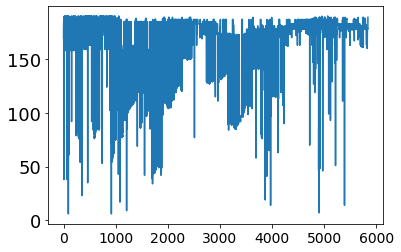

In [61]:
p = data.createFromEvent(t2[1], observatories.assa)
p.subtract_background()
p.plot()
o = p.spectrum_data.data.transpose()
m = []
for i in o:
    m.append(np.argmax(i))

plt.plot(m)

counts = {}
for i in m:
    if i in counts:
        counts[i] += 1
    else:
        counts[i] = 1

for i, j in enumerate(m):
    if j == max(counts):
        m[i] = np.nan

plt.plot(m)
pp = p.spectrum_data.data
img = PIL.Image.fromarray(pp)
img_re = img.resize((int(pp.shape[1]/10), int(p.spectrum_data.data.shape[0]/10)), resample=Image.BILINEAR)
plt.imshow(img_re, extent=[0,800,0,400], origin="lower")
plt.show()
o = np.array(img_re).transpose()
m = []
for i in o:
    m.append(np.argmax(i))

plt.plot(m)
plt.show()

for i in range(5):
    counts = {}
    for i in m:
        if i in counts:
            counts[i] += 1
        else:
            counts[i] = 1

    for i, j in enumerate(m):
        if j == max(counts):
            m[i] = np.nan
    plt.plot(m)

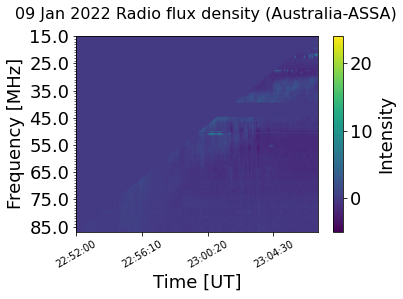

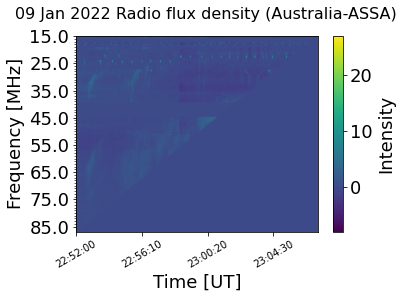

-99907.21206627104 6611.539420616056
-1712711.1757685267


In [47]:
p = data.createFromEvent(t2[0], observatories.assa)
p.subtract_background()
pu = copy.deepcopy(p)
pl = copy.deepcopy(p)
fu_mask = analysis.maskBadFrequencies(pu)
pu.spectrum_data.data[fu_mask] = np.nanmean(pu.spectrum_data.data)
pumask = maskUpper(pu.spectrum_data.data)
pu.spectrum_data.data[pumask] = np.nanmean(pu.spectrum_data.data)
pu.plot()
fl_mask = analysis.maskBadFrequencies(pl)
pl.spectrum_data.data[fl_mask] = np.nanmean(pl.spectrum_data.data)
plmask = maskLower(pl.spectrum_data.data)
pl.spectrum_data.data[plmask] = np.nanmean(pl.spectrum_data.data)
pl.plot()

p1 = np.nansum(pu.spectrum_data.data)-np.mean(p.spectrum_data.data)*p.spectrum_data.data.shape[0]*p.spectrum_data.data.shape[1]
p2 = np.nansum(pl.spectrum_data.data)-np.mean(p.spectrum_data.data)*p.spectrum_data.data.shape[0]*p.spectrum_data.data.shape[1]

print(p1, p2)
print((p2-p1)/np.nanmean(p.spectrum_data.data))


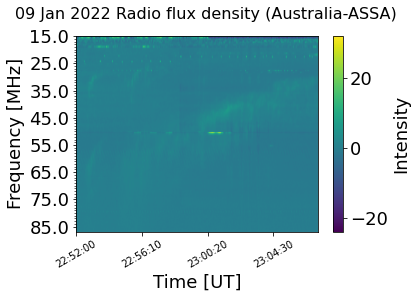

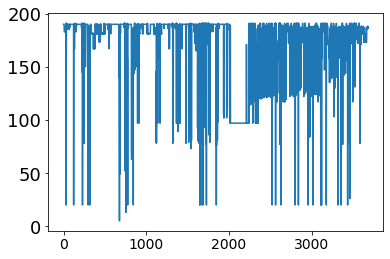

In [50]:
p.plot()
o = p.spectrum_data.data.transpose()
m = []
for i in o:
    m.append(np.argmax(i))

plt.plot(m)